In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_excel("dados_maquinas.xlsx")

In [6]:
df

,id_maquina,horas_uso,temperatura,vibracao,pressao,lubrificacao,ultima_manutencao (dias),falhou
0,M001,152,76.9,0.148,130.9,0.99,15,1
1,M002,485,80.0,0.173,88.6,0.92,59,1
2,M003,910,94.2,0.284,97.3,0.56,26,1
3,M004,320,88.3,0.128,84.4,0.96,41,1
4,M005,156,79.7,0.289,111.0,0.93,45,1
...,...,...,...,...,...,...,...,...
195,M196,280,81.1,0.028,135.2,0.83,4,1
196,M197,798,86.1,0.231,138.9,0.85,14,1
197,M198,704,91.6,0.194,107.3,0.92,37,0
198,M199,220,100.9,0.217,100.2,0.62,34,1


In [29]:
df_numeric = df.select_dtypes(include=['int64','float64'])

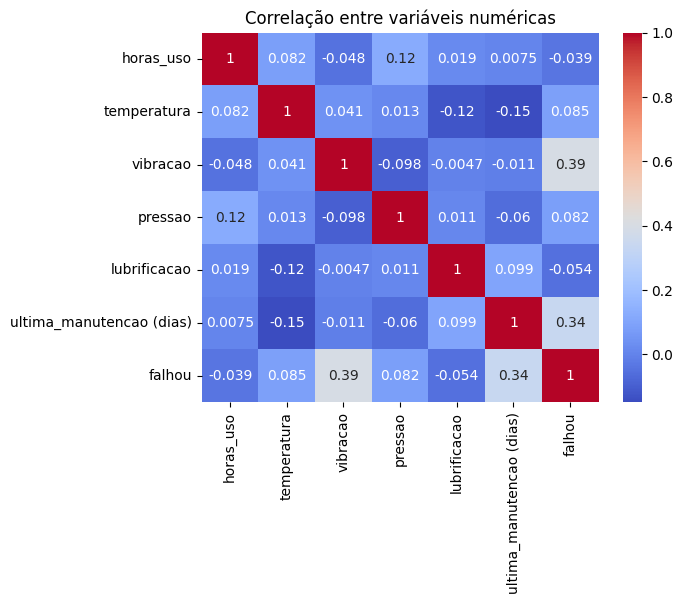

In [30]:
#df.corr() → calcule a matriz de correlação entre todas as colunas numéricas do df
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas")
plt.show()

In [31]:
X = df.drop("falhou", axis=1)
y = df["falhou"]
X = df.drop(columns=['falhou'])

In [32]:
X_num = X.select_dtypes(include=['int64','float64'])
X_cat = X.select_dtypes(include=['object','category'])

In [36]:
X_cat

,id_maquina
0,M001
1,M002
2,M003
3,M004
4,M005
...,...
195,M196
196,M197
197,M198
198,M199


In [37]:
X_num

,horas_uso,temperatura,vibracao,pressao,lubrificacao,ultima_manutencao (dias)
0,152,76.9,0.148,130.9,0.99,15
1,485,80.0,0.173,88.6,0.92,59
2,910,94.2,0.284,97.3,0.56,26
3,320,88.3,0.128,84.4,0.96,41
4,156,79.7,0.289,111.0,0.93,45
...,...,...,...,...,...,...
195,280,81.1,0.028,135.2,0.83,4
196,798,86.1,0.231,138.9,0.85,14
197,704,91.6,0.194,107.3,0.92,37
198,220,100.9,0.217,100.2,0.62,34


In [38]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

In [39]:
X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred = modelo.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[ 3  5]
 [ 0 32]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.86      1.00      0.93        32

    accuracy                           0.88        40
   macro avg       0.93      0.69      0.74        40
weighted avg       0.89      0.88      0.85        40



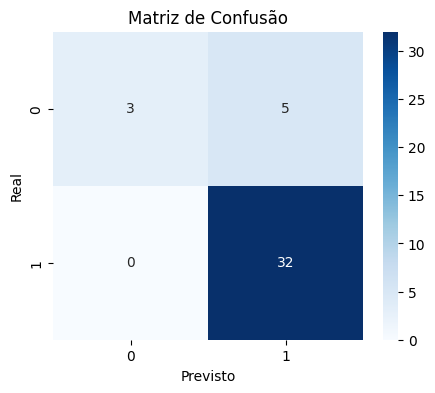

In [45]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

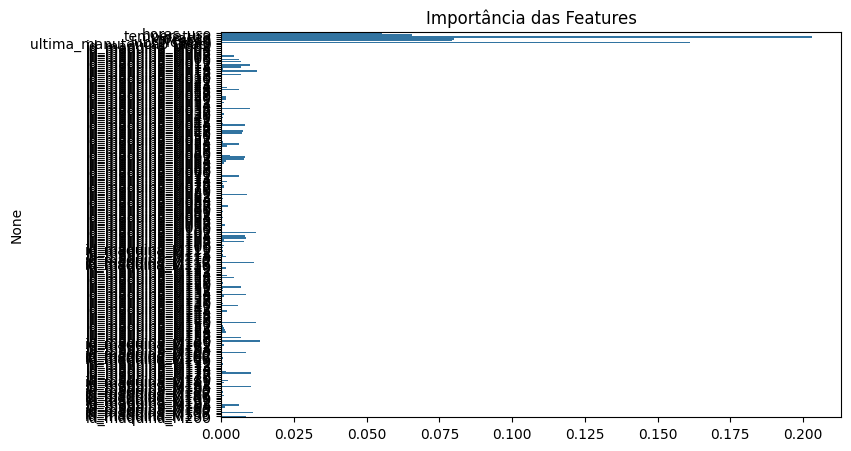

In [47]:

importances = modelo.feature_importances_
features = X_processed.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Importância das Features")
plt.show()

In [49]:
joblib.dump(modelo, "modelo_treinado.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [50]:
joblib.dump(list(X_processed.columns), "treino_cols.pkl")

['treino_cols.pkl']